In [36]:
# import dependencies
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [37]:
# generate list of sp500 indices
tickerlist = ['SPY', 'XLF', 'XLU', 'XLK', 'XLE', 'XLI',
             'XLB', 'XLP', 'XLV', 'XLY', 'XLRE', 'XLC']

# generate list of tickers
tickers = [yf.Ticker(tick) for tick in tickerlist]

# generate list of full names
namelist = [tick.info['longName'] for tick in tickers]

# create dataframe to correspond tickers and full names
name_df = pd.DataFrame({'Ticker': tickerlist,
                       'Full Name': namelist})
name_df

,Ticker,Full Name
0,SPY,SPDR S&P 500 ETF Trust
1,XLF,Financial Select Sector SPDR Fund
2,XLU,Utilities Select Sector SPDR Fund
3,XLK,Technology Select Sector SPDR Fund
4,XLE,Energy Select Sector SPDR Fund
5,XLI,Industrial Select Sector SPDR Fund
6,XLB,Materials Select Sector SPDR Fund
7,XLP,Consumer Staples Select Sector SPDR Fund
8,XLV,Health Care Select Sector SPDR Fund
9,XLY,Consumer Discretionary Select Sector SPDR Fund


In [38]:
# pull price history for each index for each target year
hist20 = [tick.history(start='2020-01-01', end='2020-12-31') for tick in tickers]
hist19 = [tick.history(start='2019-01-01', end='2019-12-31') for tick in tickers]

In [39]:
# adjust columns for both years
# add columns to history dataframes

for df in hist20:
    df['Amplitude'] = df['High'] - df['Low']
    df['Daily Change'] = df['Close'] - df['Open']
    df['Daily Change %'] = round(((df['Daily Change']/df['Open']) * 100), 2)
    df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
    df.reset_index(inplace=True)
    
    
# add columns to history dataframes

for df in hist19:
    df['Amplitude'] = df['High'] - df['Low']
    df['Daily Change'] = df['Close'] - df['Open']
    df['Daily Change %'] = round(((df['Daily Change']/df['Open']) * 100), 2)
    df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
    df.reset_index(inplace=True)

In [40]:
# remove year from dates in dataframes to make plotting easier, then add year as new column
for df in hist20:
    df['Date'] = df['Date'].dt.strftime('%m-%d')
    df['Year'] = 2020
    
for df in hist19:
    df['Date'] = df['Date'].dt.strftime('%m-%d')
    df['Year'] = 2019

In [41]:
# create dictionaries
counter = 0
hist20_dict = {}
hist19_dict = {}

# create 2020 dictionary
for df in hist20:
    hist20_dict[tickerlist[counter]] = df
    
    counter += 1
    
counter = 0

# create 2019 dictionary
for df in hist19:
    hist19_dict[tickerlist[counter]] = df
    
    counter += 1

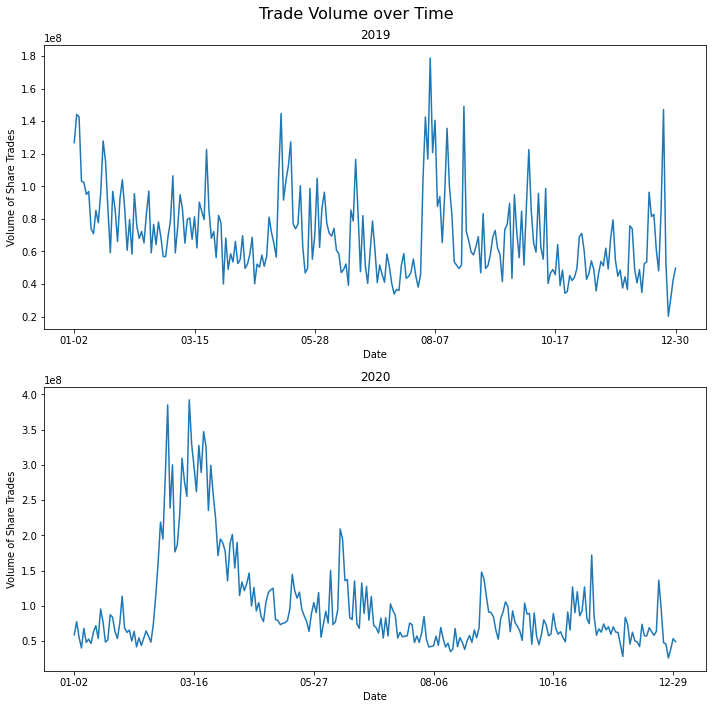

In [24]:
# plot trade volume for each year of SPY
fig, axs = plt.subplots(2,1, figsize=(10,10))

# plot volume over time for SPY data for 2019 and 2020
hist19_dict['SPY'].plot(x='Date', y='Volume', ax=axs[0], ylabel='Volume of Share Trades', legend=False, title='2019')
hist20_dict['SPY'].plot(x='Date', y='Volume', ax=axs[1], ylabel='Volume of Share Trades', legend=False, title='2020')

# format for clarity and save image
plt.suptitle('Trade Volume over Time', fontsize=16)
plt.tight_layout()
plt.savefig('spy_19_20_volume.png', facecolor='white', edgecolor='black')

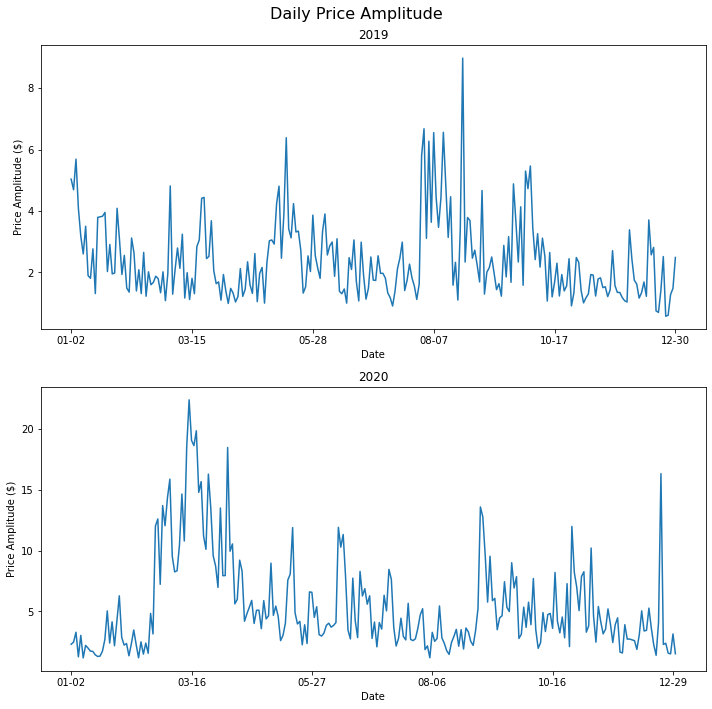

In [56]:
# plot amplitude over time for both years
# pull data to new variable for convenience
df = hist19_dict['SPY']
df2 = hist20_dict['SPY']

fig2, axs2 = plt.subplots(2,1, figsize=(10,10))

# plot both datasets on proper subplots
df.plot(x='Date', y='Amplitude', ax=axs2[0], ylabel='Price Amplitude ($)', legend=False, title='2019')
df2.plot(x='Date', y='Amplitude', ax=axs2[1], ylabel='Price Amplitude ($)', legend=False, title='2020')

# format plots for clarity and save image
fig2.suptitle('Daily Price Amplitude', fontsize=16)
plt.tight_layout()
plt.savefig('spy_19_20_amplitude.png', facecolor='white', edgecolor='black')